# EDA

In [15]:
# Used libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns


In [1]:
import main as main
import importlib
importlib.reload(main)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mervetaskaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/merveta

<module 'main' from '/Users/mervetaskaya/Documents/Projects/spotify_nlp/main.py'>

In [3]:
df_artists, df_tracks = main.read_data()

## Genre

In [4]:
df_artists = main.preprocessing_genre(df_artists)

In [7]:
# Flatten the list and count occurrences of each genre
all_genres = [genre for sublist in df_artists['cleaned_genres'] for genre in sublist]
unique_genres, genre_counts = np.unique(all_genres, return_counts=True)

# Optionally, create a DataFrame for better visualization
df_genre_counts = pd.DataFrame({
    'genre': unique_genres,
    'count': genre_counts
}).sort_values(by='count', ascending=False)

In [8]:
df_genre_counts

,genre,count
1789,pop,543
613,dance pop,485
1935,rock,431
924,folkpop,402
1800,pop rap,387
...,...,...
2242,thai rock,1
2241,thai pop,1
2240,thai indie,1
2239,thai idol,1


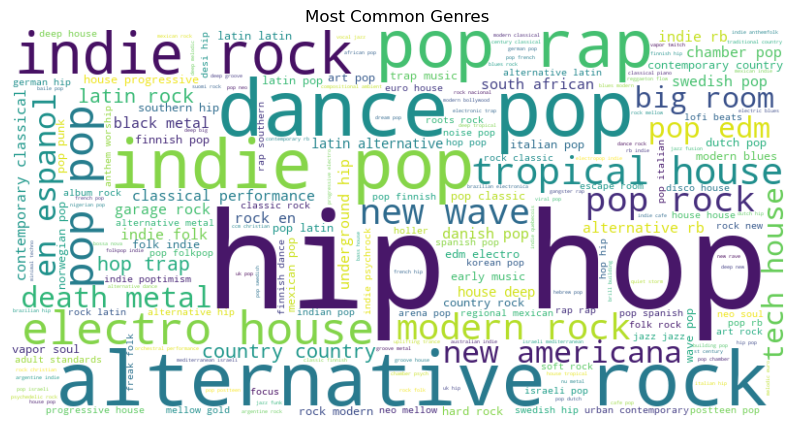

In [10]:
# Example for stemmed genres
all_stemmed_genres = " ".join([" ".join(genres) for genres in df_artists['cleaned_genres']])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_stemmed_genres)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Genres')
plt.show()


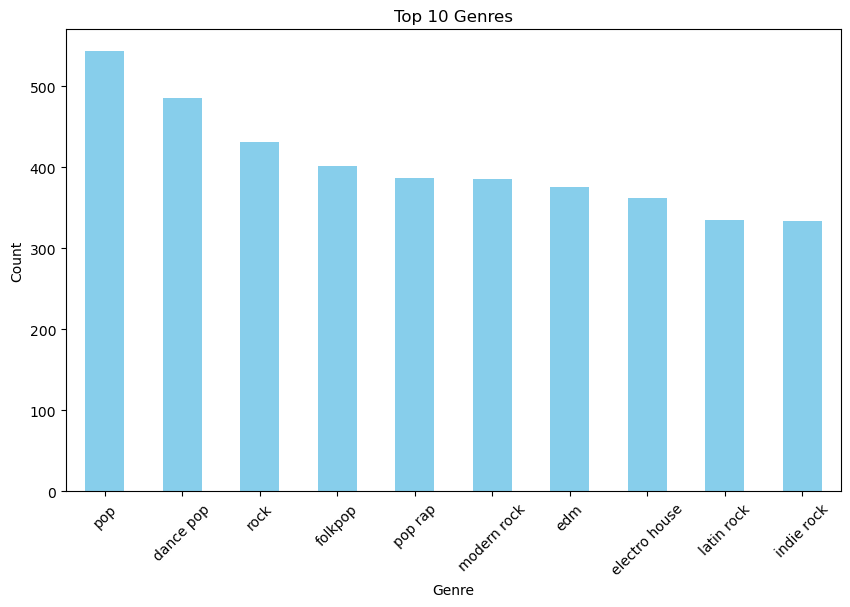

In [11]:
# Count of each unique genre
all_stemmed_genres = " ".join([" ".join(genres) for genres in df_artists['cleaned_genres']])

genre_counts = pd.Series([genre for sublist in df_artists['cleaned_genres'] for genre in sublist]).value_counts()

# Plotting
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Unique genre count
original_genres_count = len(set([genre for sublist in df_artists['cleaned_genres'] for genre in sublist]))
stemmed_genres_count = len(set([genre for sublist in df_artists['stemmed_genres'] for genre in sublist]))
lemmatized_genres_count = len(set([genre for sublist in df_artists['lemmatized_genres'] for genre in sublist]))

print(f"Original Genres: {original_genres_count}\nStemmed Genres: {stemmed_genres_count}\nLemmatized Genres: {lemmatized_genres_count}")


Original Genres: 2453
Stemmed Genres: 2450
Lemmatized Genres: 2452


In [16]:

#nltk.download('stopwords')

all_genres = [genre for sublist in df_artists['cleaned_genres'] for genre in sublist]

# Number of documents
num_documents = len(df_artists)


# Total number of words in the corpus
total_genres = len(all_genres)

# Average document length (in words)
avg_doc_length = total_genres / num_documents

# Minimum and maximum document length (in words)
min_doc_length = min(len(genres) for genres in df_artists['cleaned_genres'])
max_doc_length = max(len(genres) for genres in df_artists['cleaned_genres'])

# Vocabulary size (unique words)
vocabulary_size = len(set(all_genres))

# Most common words and their frequencies
from collections import Counter
word_frequencies = Counter(all_genres)
most_common_words = word_frequencies.most_common(5)

# Print the statistics
print(f"Number of Documents: {num_documents}")
print(f"Average Document Length: {avg_doc_length:.2f} words")
print(f"Minimum Document Length: {min_doc_length} words")
print(f"Maximum Document Length: {max_doc_length} words")
print(f"Vocabulary Size: {vocabulary_size} unique words")
print(f"Most Common Words: {most_common_words}")


Number of Documents: 32589
Average Document Length: 2.68 words
Minimum Document Length: 1 words
Maximum Document Length: 30 words
Vocabulary Size: 2453 unique words
Most Common Words: [('pop', 543), ('dance pop', 485), ('rock', 431), ('folkpop', 402), ('pop rap', 387)]


### Usage of tokenization genre 

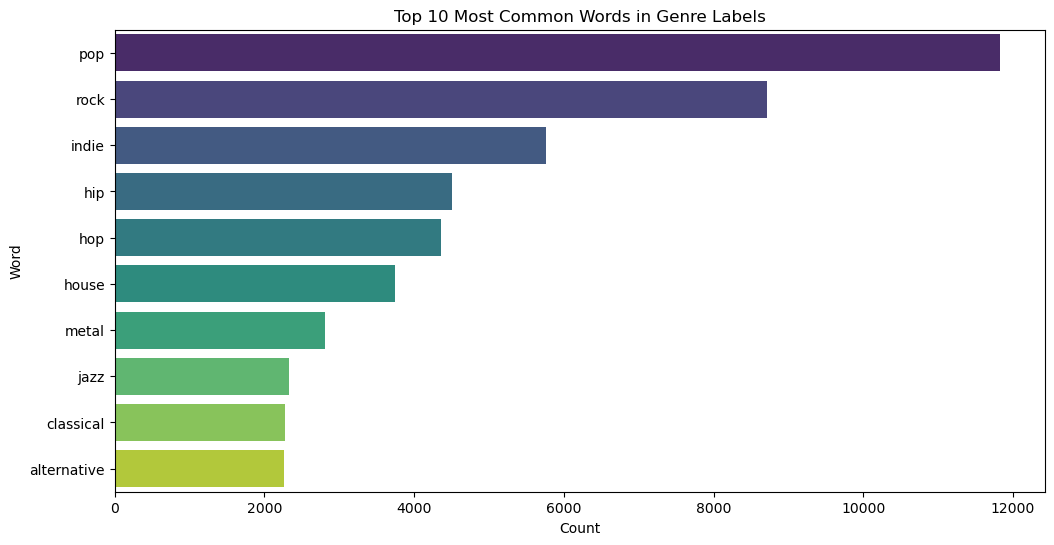

In [17]:

# Ensure you have the necessary nltk data
# nltk.download('punkt')

# Example tokenization - this will result in a new column with tokenized genres
df_artists['tokenized_genres'] = df_artists['cleaned_genres'].apply(lambda x: [word_tokenize(genre) for genre in x])

# Flatten the lists to analyze word frequencies
all_genre_words = [word for sublist in df_artists['tokenized_genres'] for subsublist in sublist for word in subsublist]

# Obtain unique words and their counts
unique_words, word_counts = np.unique(all_genre_words, return_counts=True)

# Optionally, create a DataFrame for better visualization
df_word_counts = pd.DataFrame({
    'word': unique_words,
    'count': word_counts
}).sort_values(by='count', ascending=False)

# Visualize the top 10 most common words in genre labels
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=df_word_counts.head(10), palette='viridis')
plt.title('Top 10 Most Common Words in Genre Labels')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

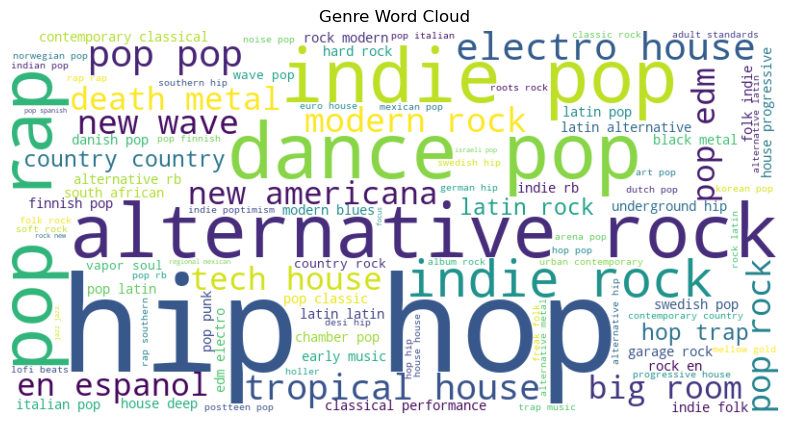

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Flatten the lists to get all words
all_genre_words = [word for sublist in df_artists['tokenized_genres'] for subsublist in sublist for word in subsublist]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(' '.join(all_genre_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()


In [19]:
import textstat

def calculate_readability_metrics(text):
    try:
        ari = textstat.automated_readability_index(text)
        fre = textstat.flesch_reading_ease(text)
        fkgl = textstat.flesch_kincaid_grade(text)
        gfi = textstat.gunning_fog(text)
    except Exception as e:
        print(f"Error: {str(e)} | Text: {text}")
        ari, fre, fkgl, gfi = [None]*4  
    
    return pd.Series((ari, fre, fkgl, gfi))

df_artists['cleaned_genres_str'] = df_artists['cleaned_genres'].astype(str)
df_artists[['ARI', 'FRE', 'FKGL', 'GFI']] = df_artists['cleaned_genres_str'].apply(calculate_readability_metrics)
#df_artists[['ARI', 'FRE', 'FKGL', 'GFI']] = df_artists['cleaned_genres'].apply(calculate_readability_metrics)


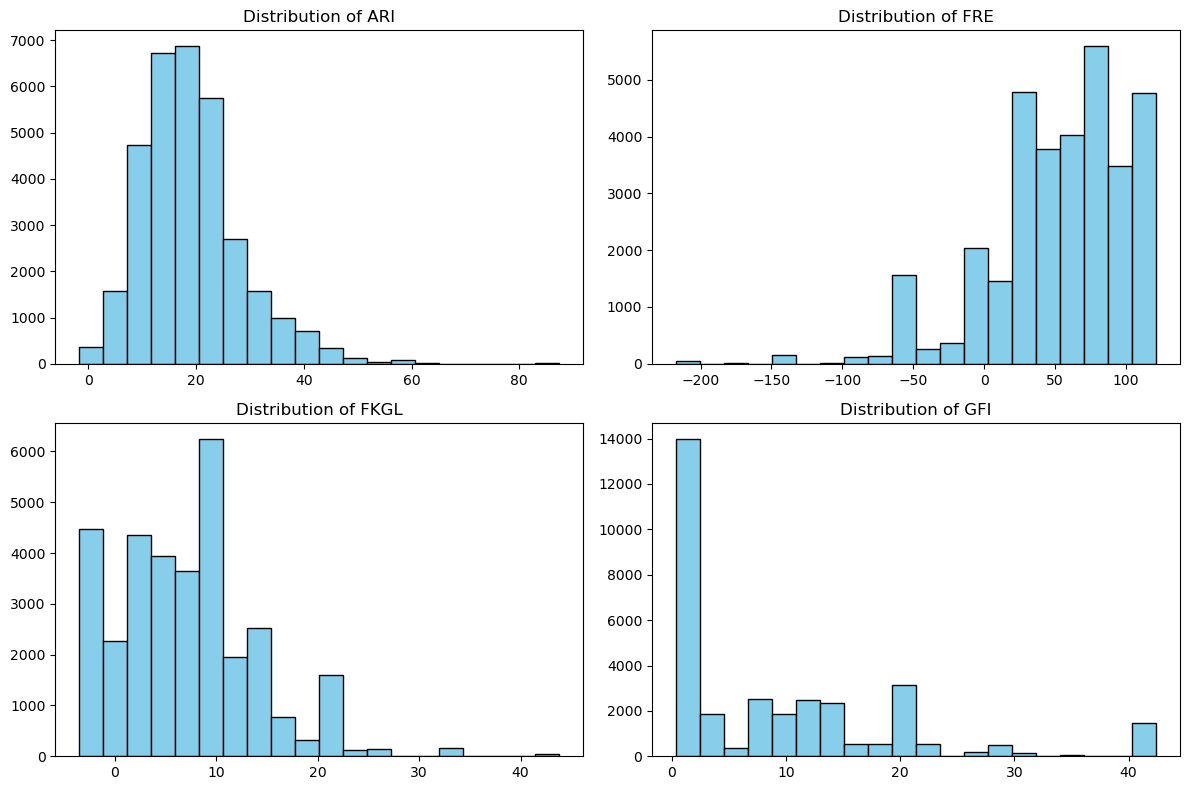

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histogram of ARI
axs[0, 0].hist(df_artists['ARI'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of ARI')

# Histogram of FRE
axs[0, 1].hist(df_artists['FRE'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribution of FRE')

# Histogram of FKGL
axs[1, 0].hist(df_artists['FKGL'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Distribution of FKGL')

# Histogram of GFI
axs[1, 1].hist(df_artists['GFI'].dropna(), bins=20, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Distribution of GFI')

plt.tight_layout()
plt.show()


In [21]:
print(df_artists[['ARI', 'FRE', 'FKGL', 'GFI']].describe())


                ARI           FRE          FKGL           GFI
count  32589.000000  32589.000000  32589.000000  32589.000000
mean      19.015950     54.041289      6.967744      9.369401
std        9.101884     48.828246      6.852850     10.217030
min       -1.700000   -217.190000     -3.500000      0.400000
25%       12.500000     34.590000      2.900000      1.200000
50%       17.700000     59.970000      6.800000      7.200000
75%       23.500000     87.720000     10.000000     14.530000
max       87.400000    121.220000     43.800000     42.400000
